In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Daily+temperature+data.csv", header=1)
df.columns = ['Date', 'Temperature']
df.head()

,Date,Temperature
0,01-02-2017,17.4
1,01-03-2017,18.5
2,01-04-2017,16.8
3,01-05-2017,11.5
4,01-06-2017,9.5


In [3]:
df = df.set_index('Date')

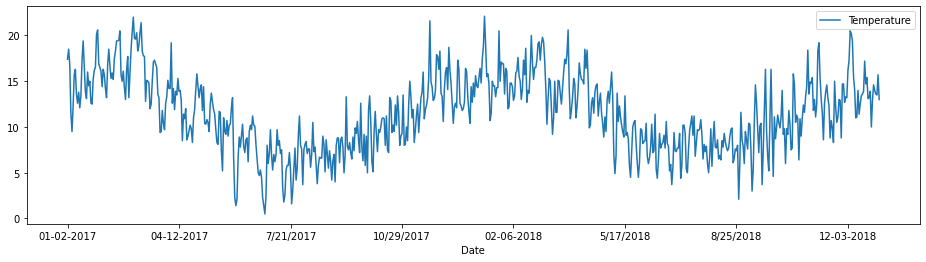

In [4]:
df.plot(figsize=(16,4))
plt.legend()
plt.show(block=False)

In [5]:
print("No. of data points:", len(df))

No. of data points: 729


In [6]:
train_size = 511
train = df[0:train_size]
test = df[train_size:]

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Temperature'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
model_fit.params

{'smoothing_level': 0.2,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 17.4,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [8]:
y_hat_ses=test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(df)-train_size) 

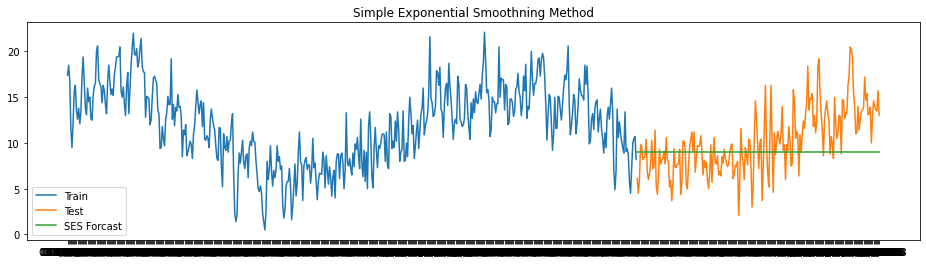

In [9]:
plt.figure(figsize=(16,4))
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='SES Forcast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothning Method')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_ses['ses_forecast'])) 
mape = np.round(np.mean(np.abs(test['Temperature'] - y_hat_ses['ses_forecast'])*100/test['Temperature']))
results = pd.DataFrame({'Method':['SES Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results.head()

,Method,MAPE,RMSE
0,SES Method,30.0,3.620379


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Temperature']),seasonal_periods=30, trend='add',seasonal='mul')
model_fit = model.fit(optimized=True)
model_fit.params

{'smoothing_level': 0.6546111612830774,
 'smoothing_slope': 1.48841053945496e-14,
 'smoothing_seasonal': 2.1891303807605033e-14,
 'damping_slope': nan,
 'initial_level': 12.313950682746022,
 'initial_slope': 1.2005093281565357e-12,
 'initial_seasons': array([1.40128713, 1.41674771, 1.45609013, 1.38678599, 1.37095334,
        1.36734009, 1.44097032, 1.4615457 , 1.43002357, 1.42579692,
        1.36446544, 1.29398213, 1.42123696, 1.43279206, 1.48699135,
        1.36157353, 1.40146806, 1.38431785, 1.29517333, 1.31869995,
        1.40317414, 1.31866442, 1.21705983, 1.30653434, 1.33287098,
        1.4081396 , 1.47176732, 1.5419968 , 1.49927641, 1.49614949]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [24]:
y_hat_ses=test.copy()
y_hat_ses['hes_forecast'] = model_fit.forecast(len(df)-train_size) 

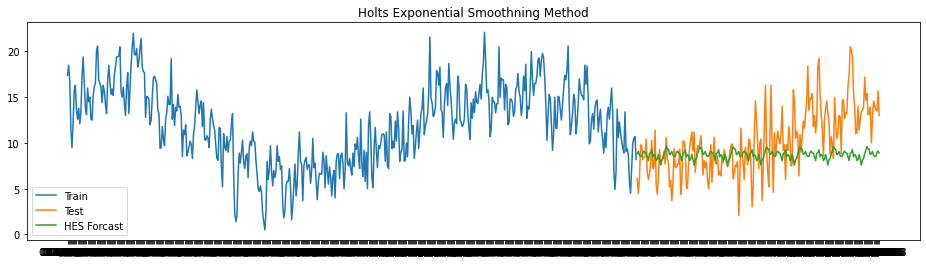

In [25]:
plt.figure(figsize=(16,4))
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.plot(y_hat_ses['hes_forecast'], label='HES Forcast')
plt.legend(loc='best')
plt.title('Holts Exponential Smoothning Method')
plt.show()

In [26]:
rmse = np.sqrt(mean_squared_error(test['Temperature'], y_hat_ses['hes_forecast'])) 
mape = np.round(np.mean(np.abs(test['Temperature'] - y_hat_ses['hes_forecast'])*100/test['Temperature']))
results = results.append(pd.DataFrame({'Method':['HES Method'], 'MAPE':[mape], 'RMSE':[rmse]}))
results.head()

,Method,MAPE,RMSE
0,SES Method,30.0,3.620379
0,HES Method,30.0,3.662722
0,HES Method,30.0,3.745030
0,HES Method,30.0,3.745208
0,HES Method,30.0,3.745208
